In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"C:\Users\ameys\Desktop\Projects\Phishing URL Predictor\dataset\UCI_dataset.csv")


In [2]:
# df = df[['Prefix_Suffix',
#         'having_Sub_Domain',
#         'SSLfinal_State',
#         'Domain_registeration_length',
#         'Request_URL',
#         'URL_of_Anchor',
#         'Links_in_tags',
#         'SFH',
#         'age_of_domain',
#         'DNSRecord',
#         'web_traffic',
#         'Page_Rank',
#         'Google_Index', 'Result']]

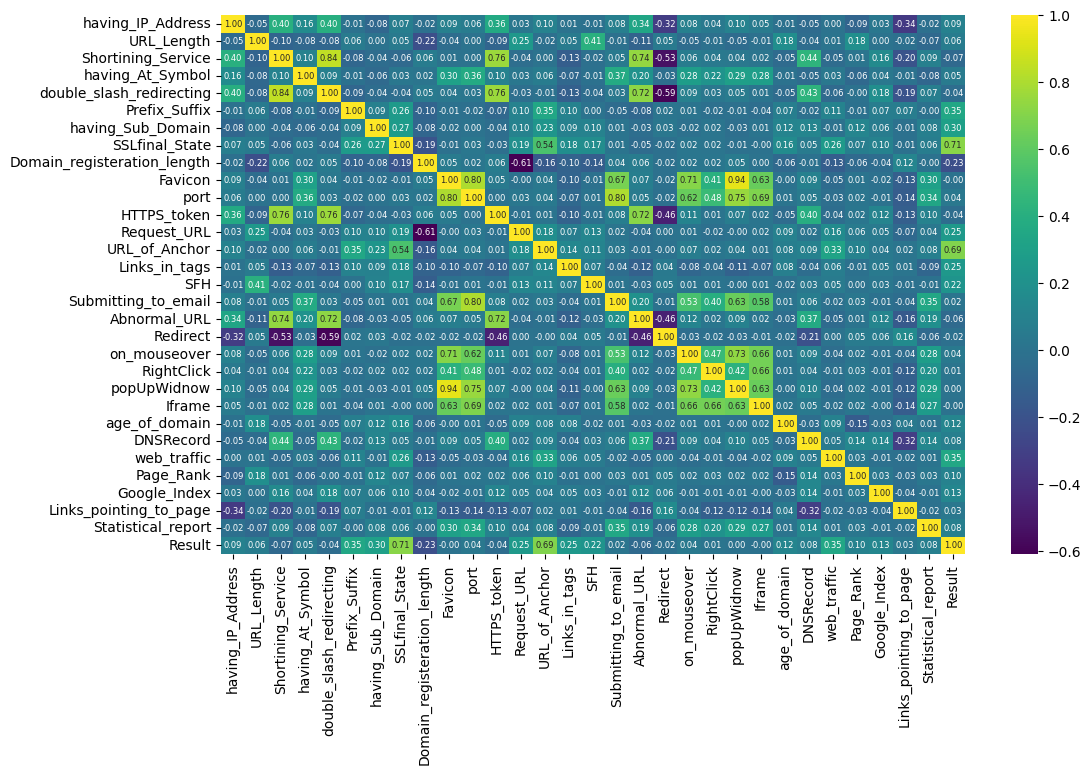

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
heatmap = sns.heatmap(df.corr(), 
                      
                      annot=True, 
                      fmt=".2f", 
                      annot_kws={"size": 6},  # Increase annotation font size
                      cmap='viridis')         # Optional: change color scheme



plt.show()

In [4]:
X = df.drop(['Result','Links_in_tags','Domain_registeration_length','SFH','age_of_domain','DNSRecord','Page_Rank','Google_Index','having_IP_Address', 'URL_Length','Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Favicon', 'port', 'HTTPS_token', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'Links_pointing_to_page','Statistical_report'], axis = 1)
y = df['Result']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}") 

Features shape: (11055, 6)
Target shape: (11055,)


In [5]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=10)



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import numpy as np


In [8]:
models = [
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    XGBClassifier(
        n_estimators=186,
        learning_rate=0.17540108887868971, 
        max_depth=5, 
        min_child_weight=1, 
        subsample=0.7256690687623746, 
        colsample_bytree=0.8196526102180001, 
        gamma=0.010950425456138637, 
        alpha=0
    )
]

for model in models:
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(f'Train accuracy: {accuracy_score(y_train, y_train_pred)}')
    print(f'Test accuracy: {accuracy_score(y_test, y_test_pred)}')
    print('\n--------------------------------\n')

LogisticRegression
Train accuracy: 0.916214382632293
Test accuracy: 0.905924920850294

--------------------------------

GaussianNB
Train accuracy: 0.5760967887833559
Test accuracy: 0.5734961555857079

--------------------------------

KNeighborsClassifier
Train accuracy: 0.9166666666666666
Test accuracy: 0.9086386250565355

--------------------------------

DecisionTreeClassifier
Train accuracy: 0.9352103120759837
Test accuracy: 0.9317051108095884

--------------------------------

RandomForestClassifier
Train accuracy: 0.9352103120759837
Test accuracy: 0.9317051108095884

--------------------------------

AdaBoostClassifier
Train accuracy: 0.9231117141564903
Test accuracy: 0.9203980099502488

--------------------------------

GradientBoostingClassifier
Train accuracy: 0.9297829036635007
Test accuracy: 0.9262777023971054

--------------------------------

SVC
Train accuracy: 0.926164631388512
Test accuracy: 0.9176843057440073

--------------------------------

XGBClassifier
Train accu

[0]	validation_0-logloss:0.56841	validation_1-logloss:0.57009
[1]	validation_0-logloss:0.49277	validation_1-logloss:0.49814
[2]	validation_0-logloss:0.43895	validation_1-logloss:0.44584
[3]	validation_0-logloss:0.39555	validation_1-logloss:0.40168
[4]	validation_0-logloss:0.35390	validation_1-logloss:0.36134
[5]	validation_0-logloss:0.32197	validation_1-logloss:0.33007
[6]	validation_0-logloss:0.29799	validation_1-logloss:0.30522
[7]	validation_0-logloss:0.27543	validation_1-logloss:0.28379
[8]	validation_0-logloss:0.26009	validation_1-logloss:0.26770
[9]	validation_0-logloss:0.24489	validation_1-logloss:0.25355
[10]	validation_0-logloss:0.23457	validation_1-logloss:0.24261
[11]	validation_0-logloss:0.22641	validation_1-logloss:0.23380
[12]	validation_0-logloss:0.21439	validation_1-logloss:0.22181
[13]	validation_0-logloss:0.20886	validation_1-logloss:0.21607
[14]	validation_0-logloss:0.20247	validation_1-logloss:0.21034
[15]	validation_0-logloss:0.19842	validation_1-logloss:0.20604
[1

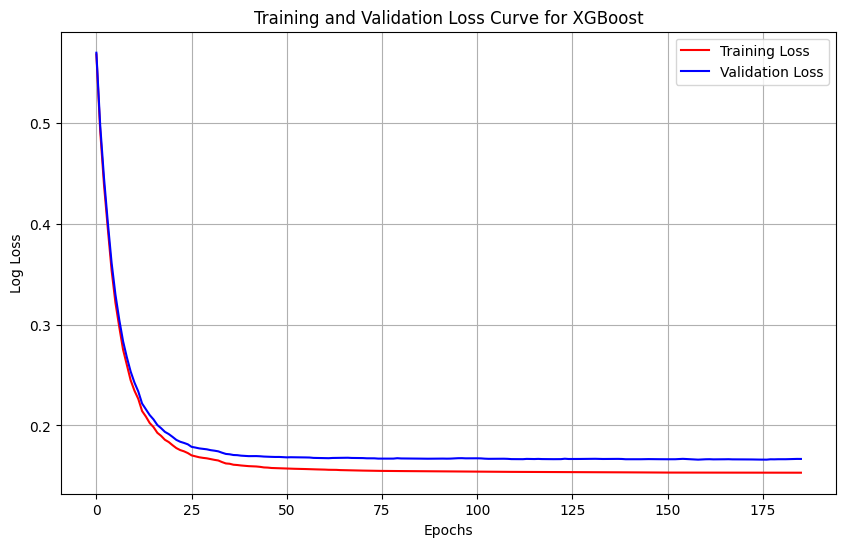

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Define the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=186,
    learning_rate=0.17540108887868971, 
    max_depth=5, 
    min_child_weight=1, 
    subsample=0.7256690687623746, 
    colsample_bytree=0.8196526102180001, 
    gamma=0.010950425456138637, 
    alpha=0,
    eval_metric="logloss"  # Log loss as the evaluation metric
)

# Fit the model while tracking training and validation loss
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

# Extract loss values
results = xgb_model.evals_result()
train_loss = results['validation_0']['logloss']
test_loss = results['validation_1']['logloss']

# Plot the loss curves
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label="Training Loss", color="r")
plt.plot(test_loss, label="Validation Loss", color="b")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Training and Validation Loss Curve for XGBoost")
plt.legend()
plt.grid()
plt.show()


In [10]:
y_true = y_train
y_pred = model.predict(X_train)

In [11]:
cm = confusion_matrix(y_true, y_pred)


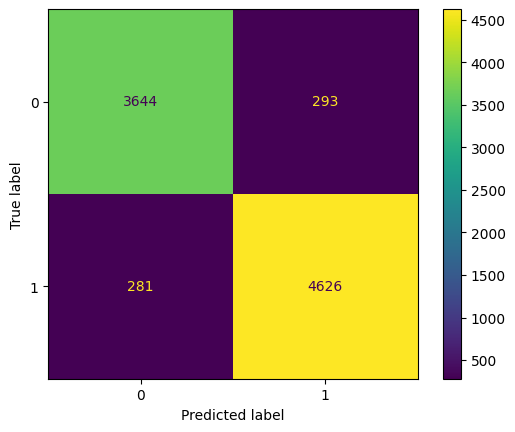

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.show()


In [13]:
X_test.head()

,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic
4131,1,-1,1,1,1,1
3762,-1,1,1,1,0,0
3068,-1,-1,-1,1,-1,0
6146,-1,0,-1,-1,-1,-1
2180,-1,0,1,1,1,1


In [14]:
from url_extractor import extractor

url = "https://service-mitld.firebaseapp.com/"

features = extractor(url)


values = pd.DataFrame([features], columns=X_train.columns)
print(values)
prediction = model.predict(values)



Issuer: Google Trust Services
Error processing URL: 404 Client Error: Not Found for url: https://service-mitld.firebaseapp.com/
this is the traffic > 0
   Prefix_Suffix  having_Sub_Domain  SSLfinal_State  Request_URL  \
0              1                 -1              -1            1   

   URL_of_Anchor  web_traffic  
0              1            1  


In [15]:
values.head()

,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic
0,1,-1,-1,1,1,1


In [16]:
if prediction == 0:
    print("It is a Legitimate Website")
else:
    print("It is a Phishing Link")

It is a Phishing Link


In [17]:
from joblib import dump

dump(model, "xgb_model.pkl")

['xgb_model.pkl']